In [1]:
# import tools
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
#load data
df = pd.read_csv('/Users/nutorbitx/Documents/Project/LinearRegression/train.csv')
# print(list(df))
train_x = df['LotArea']
train_y = df['SalePrice']
train_x,train_y = train_x.reshape(len(train_x),1),train_y.reshape(len(train_y),1)
# print(df.head(10))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


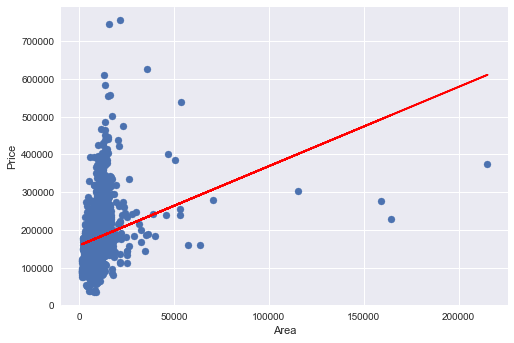

In [3]:
LR = LinearRegression()
LR.fit(train_x,train_y)

plt.scatter(train_x,train_y)
plt.xlabel('Area')
plt.ylabel('Price')
plt.plot(train_x,LR.predict(train_x),color='red')
plt.show()

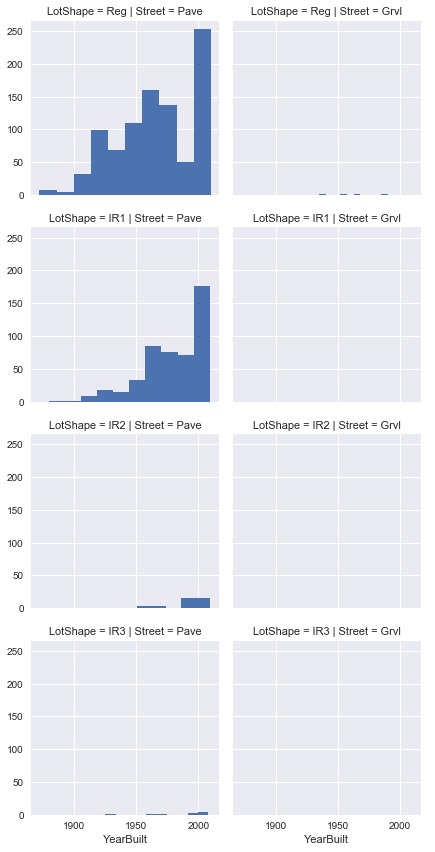

In [4]:
# visualization 
grid = sns.FacetGrid(df,col = 'Street',row = 'LotShape')
grid.map(plt.hist,'YearBuilt')
grid.add_legend();
plt.show()

# filter data
# print(df['LotShape'])
# print(df['LotShape'].value_counts())
df['Street'] = df['Street'].fillna('Grvl')
df['Street'] = df['Street'].map( {'Pave': 0, 'Grvl': 1} ).astype(int)
df['LotShape'] = df['LotShape'].fillna('IR1')
df['LotShape'] = df['LotShape'].map( {'Reg': 0, 'IR1': 0 ,'IR2': 1, 'IR3': 1} ).astype(int)
# print(df['LotShape'])
# print(df['LotShape'].value_counts())

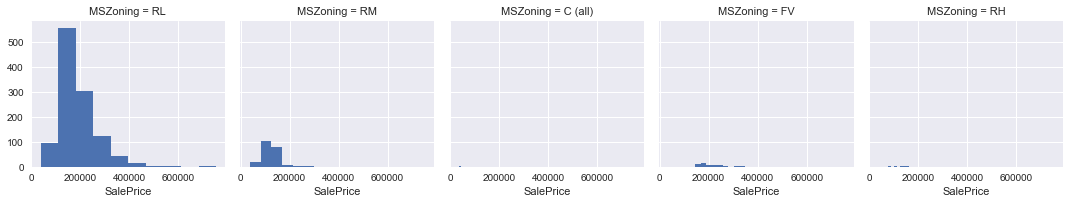

In [5]:
# visualization
grid = sns.FacetGrid(df,col ='MSZoning')
grid.map(plt.hist,'SalePrice')
grid.add_legend();
plt.show()

# filter data
df['MSZoning'].value_counts()
df['MSZoning'] = df['MSZoning'].map({'RL':0,'RM':1,'FV':2,'RH':2,'C':2})
df = df[['MSZoning','Street','LotShape','GarageArea','LotArea']]
df = df.fillna(0)
# print(df['MSZoning'])
# df = df[df['MSZoning'] == 'RL']

In [6]:
lr = LinearRegression()
lr.fit(df,train_y)
test = pd.DataFrame({'MSZoning':500,'Street':1,'LotShape':0,'GarageArea':1000,'LotArea':1000}, index=[0])

pred = lr.predict(df)
lr.score(df,pred)

1.0

(100, 2)
(100,)


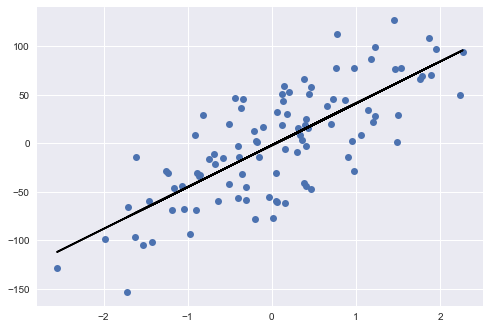

In [7]:
# implement Linear Regression
from sklearn.datasets.samples_generator import make_regression 

x, y = make_regression(n_samples=100, n_features=1, n_informative=1, random_state=0, noise=35) 
x = np.c_[ np.ones(100), x] 

theta = np.ones(2)
# print(theta.shape,x.shape)
# print(theta)
print(x.shape)
print(y.shape)

alpha = 0.01
iterator = 10000
for it in range(iterator):
    h = np.dot(x,theta)
    loss = h - y
    J = np.sum(loss ** 2) // (2*100)
    gradient = np.dot(loss, x) // 100
    theta -= alpha * gradient
for i in range(x.shape[1]):
    y_predict = theta[0] + theta[1]*x 
plt.plot(x[:,1],y,'o')
plt.plot(x,y_predict,'k-')
plt.show()